In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [3]:
doc = DocumentFile.from_pdf("/home/joe/ttop/nlp_proj/data/pdf_resumes/CV_Brut/01_Ibrahim_LAHLOU_Curriculum_Vitae_DA__eng_ (1).pdf")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [4]:
predictor = ocr_predictor(pretrained=True)

  0%|          | 0/65814772 [00:00<?, ?it/s]

/home/joe/ttop/nlp_proj/doctr/.venv/lib/python3.12/site-packages/doctr/models/utils/pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(arch

  0%|          | 0/63286381 [00:00<?, ?it/s]

In [5]:
# Display the architecture
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=True)
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): FAST()
  )
  (reco_predictor): RecognitionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(32, 128), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=False)
      (normalize): Normalize(mean=(0.694, 0.695, 0.693), std=(0.299, 0.296, 0.301))
    )
    (model): CRNN(
      (feat_extractor): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=

In [6]:
result = predictor(doc)

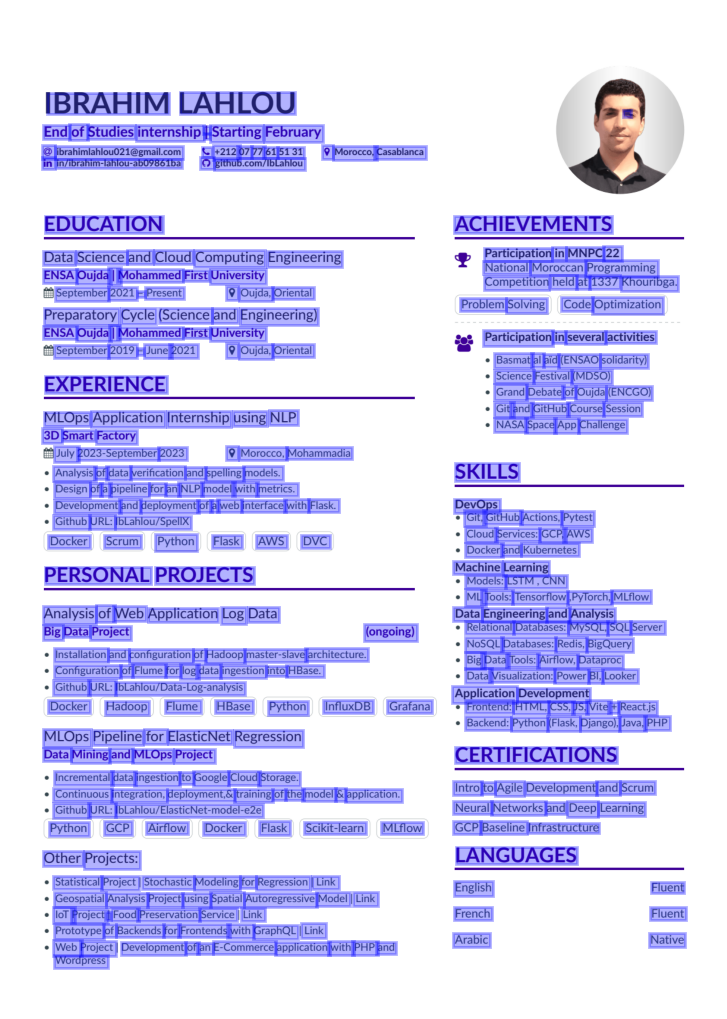

In [7]:
result.show()

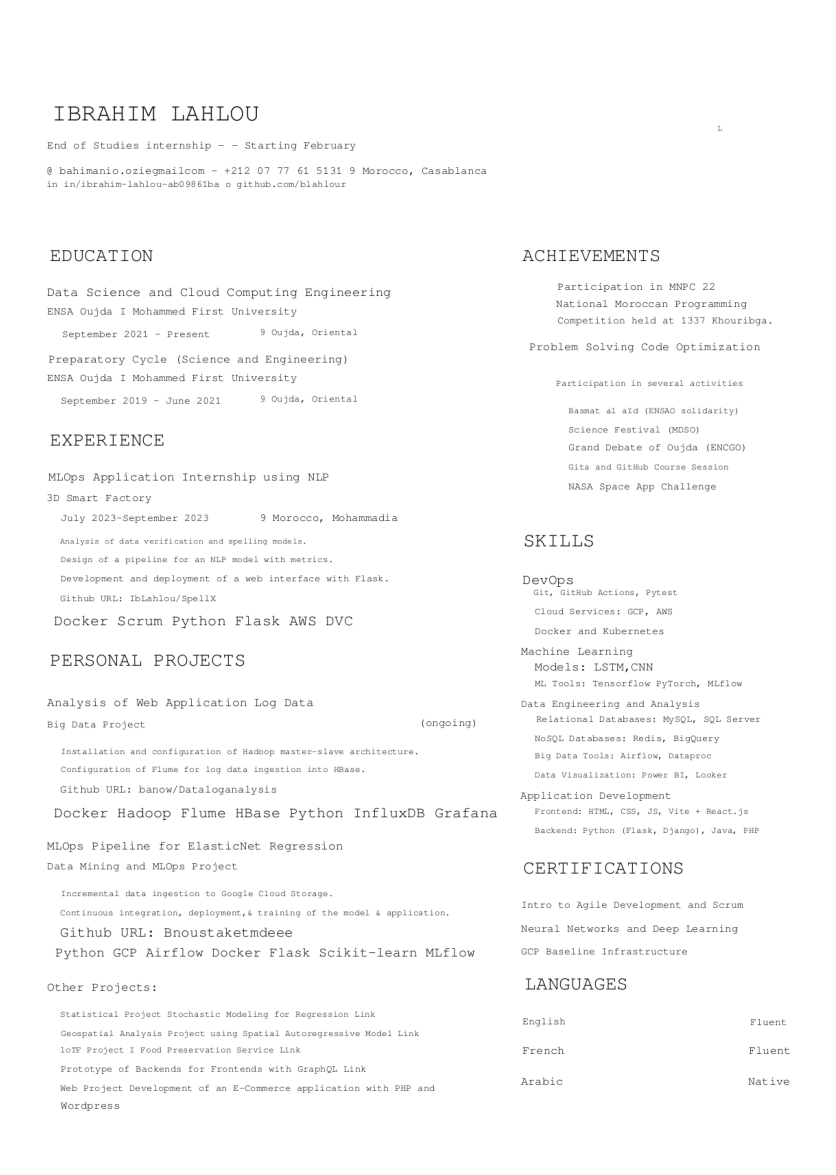

In [15]:
synthetic_pages = result.synthesize()
plt.figure(figsize=(25, 15))
plt.imshow(synthetic_pages[0])
plt.axis('off')
plt.show()

In [11]:
from pprint import pprint

In [12]:
# JSON export
json_export = result.export()
pprint(json_export)

{'pages': [{'blocks': [{'artefacts': [],
                        'geometry': ((np.float64(0.04433642947103272),
                                      np.float64(0.0830078125)),
                                     (np.float64(0.9556635705289673),
                                      np.float64(0.958984375))),
                        'lines': [{'geometry': ((np.float64(0.05124042296389586),
                                                 np.float64(0.0830078125)),
                                                (np.float64(0.40196329240134343),
                                                 np.float64(0.1044921875))),
                                   'objectness_score': 0.8603249192237854,
                                   'words': [{'confidence': 0.9410423040390015,
                                              'crop_orientation': {'confidence': None,
                                                                   'value': 0},
                                              'ge

In [16]:
string_result = result.render()
print(string_result)

IBRAHIM LAHLOU
L
End of Studies internship - - Starting February
@ bahimanio.oziegmailcom - +212 07 77 61 5131 9 Morocco, Casablanca
in in/ibrahim-lahlou-ab09861ba o github.com/blahlour
EDUCATION
ACHIEVEMENTS
Data Science and Cloud Computing Engineering
Participation in MNPC 22
National Moroccan Programming
ENSA Oujda I Mohammed First University
Competition held at 1337 Khouribga.
September 2021 - Present
9 Oujda, Oriental
Problem Solving Code Optimization
Preparatory Cycle (Science and Engineering)
ENSA Oujda I Mohammed First University
Participation in several activities
September 2019 - June 2021
9 Oujda, Oriental
Basmat al aïd (ENSAO solidarity)
Science Festival (MDSO)
EXPERIENCE
Grand Debate of Oujda (ENCGO)
Gita and GitHub Course Session
MLOps Application Internship using NLP
NASA Space App Challenge
3D Smart Factory
July 2023-September 2023
9 Morocco, Mohammadia
Analysis of data verification and spelling models.
SKILLS
Design of a pipeline for an NLP model with metrics.
Developm